# Build A Basic Chatbot With Langgraph(GRAPH API)

### 1. Install and Import

In [1]:
# !uv pip install typing_extensions
# !uv pip install langgraph
# !uv pip install langchain_tavily
# !uv pip install langchain-groq
# !uv pip install langsmith
# !uv pip install python-dotenv


In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv('token.env')  # path to your token.env file

langchain_api_key = os.getenv("langchain_api_key")
openai_api_keys = os.getenv("openai_api_key")
tavily_api_key = os.getenv("tavily_api_key")
groq_api_key = os.getenv("groq_api_key")
print("Langchain Key:      ",langchain_api_key[:5] + "..." if langchain_api_key else "key not found")
print("openai_api_key Key: ",openai_api_keys[:5] + "..." if openai_api_keys else "key not found")
print("tavily_api_key Key: ",tavily_api_key[:5] + "..." if tavily_api_key else "key not found")
print("groq_api_key Key:   ",groq_api_key[:5] + "..." if groq_api_key else "key not found")






langchain_api_key = os.getenv("langchain_api_key")
openai_api_keys = os.getenv("openai_api_key")

print("Langchain Key:      ",langchain_api_key[:5] + "..." if langchain_api_key else "key not found")
print("openai_api_key Key: ",openai_api_keys[:5] + "..." if openai_api_keys else "key not found")


Langchain Key:       lsv2_...
openai_api_key Key:  sk-pr...
groq_api_key Key:    gsk_J...


In [4]:
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = langchain_api_key

### 2. Add State

In [9]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]


### 3. Define LLM and Initiliaze

In [6]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model


llm=ChatGroq(model="llama3-8b-8192")

llm=init_chat_model("groq:llama3-8b-8192")
llm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000019A815B1450>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019A815B1E50>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

### 4. Chatbot

In [7]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

### 5. Define Node 

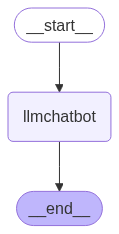

In [8]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)

## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()
graph

In [ ]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
from pprint import pprint
response=graph.invoke({"messages":"Hi"})
pprint(response["messages"])

[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='f31f838e-3bf4-4286-971f-4515ce97ddeb'),
 AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.125352065, 'prompt_time': 0.026521139, 'queue_time': 0.38086473099999996, 'total_time': 0.151873204}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--5dceb62f-bad4-4edf-9f1f-8b4c97b7e5f0-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]


In [13]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [16]:
for event in graph.stream({"messages":"Hi How are you?"}):
    print(event)

{'llmchatbot': {'messages': [AIMessage(content="I'm just a language model, I don't have feelings or emotions like humans do, but I'm here to help you with any questions or tasks you have! I'm functioning properly and ready to assist you. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 15, 'total_tokens': 66, 'completion_time': 0.203689541, 'prompt_time': 0.012272505, 'queue_time': 0.24820427900000003, 'total_time': 0.215962046}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--02877e4f-8344-49ca-8e63-fcfdc82e46f8-0', usage_metadata={'input_tokens': 15, 'output_tokens': 51, 'total_tokens': 66})]}}


In [14]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just an AI, so I don't have emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have! How about you? How's your day going?


### Chatbot With Tool

In [17]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

d:\Coursera Courses (NVME)\LLM freecodecamp\AI-Agent-Agentic-LanggraphCrash-course\agent\Lib\site-packages\langchain_tavily\tavily_crawl.py:80: SyntaxWarning: invalid escape sequence '\.'
  ex. "Crawl only the docs.tavily.com subdomain" ---> ["^docs\.tavily\.com$"]
d:\Coursera Courses (NVME)\LLM freecodecamp\AI-Agent-Agentic-LanggraphCrash-course\agent\Lib\site-packages\langchain_tavily\tavily_crawl.py:99: SyntaxWarning: invalid escape sequence '\.'
  ex. "Crawl tavily.com but exclude the docs.tavily.com subdomain from the crawl" ---> ["^docs\.tavily\.com$"]
d:\Coursera Courses (NVME)\LLM freecodecamp\AI-Agent-Agentic-LanggraphCrash-course\agent\Lib\site-packages\langchain_tavily\tavily_crawl.py:231: SyntaxWarning: invalid escape sequence '\.'
  ex. ["^docs\.example\.com$"]
d:\Coursera Courses (NVME)\LLM freecodecamp\AI-Agent-Agentic-LanggraphCrash-course\agent\Lib\site-packages\langchain_tavily\tavily_crawl.py:241: SyntaxWarning: invalid escape sequence '\.'
  ex. [^private\.example\.

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling c

In [ ]:
## Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [ ]:
tools=[tool,multiply]

In [ ]:
llm_with_tool=llm.bind_tools(tools)

In [ ]:
llm_with_tool

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))



In [ ]:
response=graph.invoke({"messages":"What is the recent ai news"})

In [ ]:
response['messages'][-1].content

In [ ]:
for m in response['messages']:
    m.pretty_print()

In [ ]:
response=graph.invoke({"messages":"What is 5 multiplied by 2"})
for m in response['messages']:
    m.pretty_print()


In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

### ReAct Agent Architecture

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response=graph.invoke({"messages":"Give me the recent ai news and then multiply 5 by 10"})
for m in response['messages']:
    m.pretty_print()

## Adding Memory In Agentic Graph

In [ ]:
response=graph.invoke({"messages":"Hello my name is KRish"})
for m in response['messages']:
    m.pretty_print()

In [ ]:
response=graph.invoke({"messages":"What is my name"})
for m in response['messages']:
    m.pretty_print()

In [ ]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")

## compile the graph
graph=builder.compile(checkpointer=memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config={"configurable":{"thread_id":"1"}}

response=graph.invoke({"messages":"Hi my name is Krish"},config=config)

response



In [ ]:
response['messages'][-1].content

In [ ]:
response=graph.invoke({"messages":"Hey what is my name"},config=config)

print(response['messages'][-1].content)

In [ ]:
response=graph.invoke({"messages":"Hey do you remember mmy name"},config=config)

print(response['messages'][-1].content)

### Streaming

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [ ]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

In [ ]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

In [ ]:
for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="values"):
    print(chunk)

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

In [ ]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

In [ ]:
config = {"configurable": {"thread_id": "5"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)